In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

In [2]:
df = pd.DataFrame()

Insert File Path to be Parsed

In [3]:
for dirpath, dirs, files in os.walk("C:\\Users\\cadea\\OneDrive\\Desktop\\CID Data Processing\\10bar_isooctane_0p5_phi\\Dataframe Data"):
    for filename in files:
        new_df = pd.read_csv(dirpath + "\\" + filename) #can include index_column=0 if you don't want the new index
        df = pd.concat([df,new_df])
df = df.reset_index(drop=True)

In [4]:
df

,Inj Num,Pressure(Bar),Phi,Fuel Type,Chamber Air Temp,Inj Press,DOI,Chamber Press,Period,Wall Temp,Time
0,0,9.920528,0p5,isooctane,1000,1000.0,1200.0,10.0,0.00002,800.0,0.00
1,0,10.204670,0p5,isooctane,1000,1000.0,1200.0,10.0,0.00002,800.0,0.02
2,0,10.140638,0p5,isooctane,1000,1000.0,1200.0,10.0,0.00002,800.0,0.04
3,0,10.204670,0p5,isooctane,1000,1000.0,1200.0,10.0,0.00002,800.0,0.06
4,0,10.124630,0p5,isooctane,1000,1000.0,1200.0,10.0,0.00002,800.0,0.08
...,...,...,...,...,...,...,...,...,...,...,...
859995,8,14.083114,0p5,isooctane,950,1000.0,1200.0,10.0,0.00002,750.0,199.90
859996,8,14.043094,0p5,isooctane,950,1000.0,1200.0,10.0,0.00002,750.0,199.92
859997,8,14.035090,0p5,isooctane,950,1000.0,1200.0,10.0,0.00002,750.0,199.94
859998,8,14.015080,0p5,isooctane,950,1000.0,1200.0,10.0,0.00002,750.0,199.96


Plot Pressure vs Time For All Injections at Each Temperature

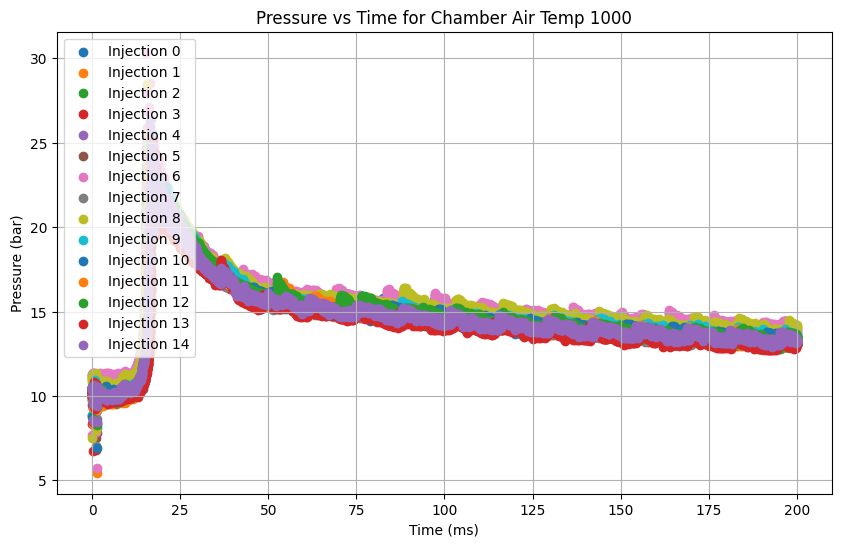

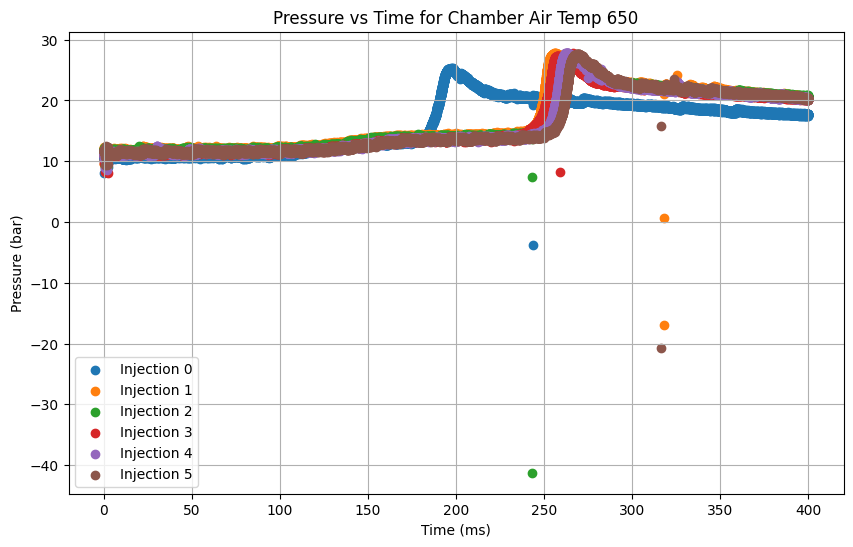

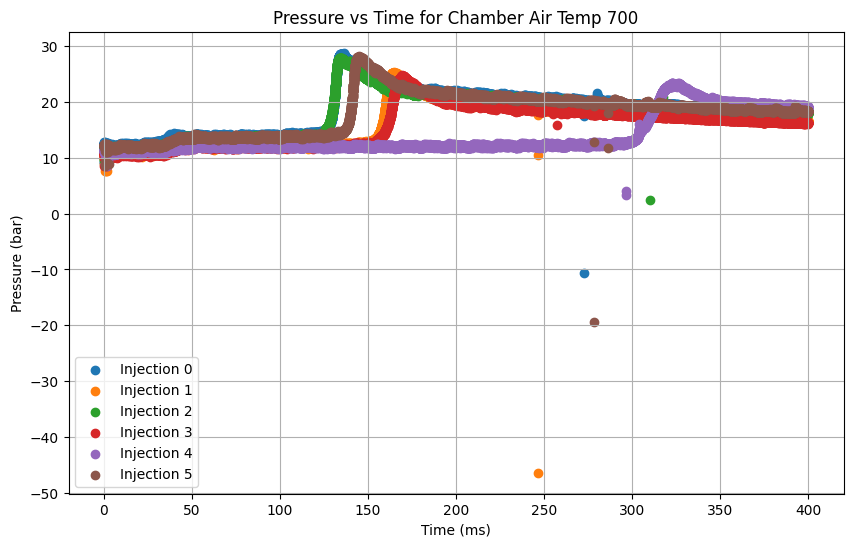

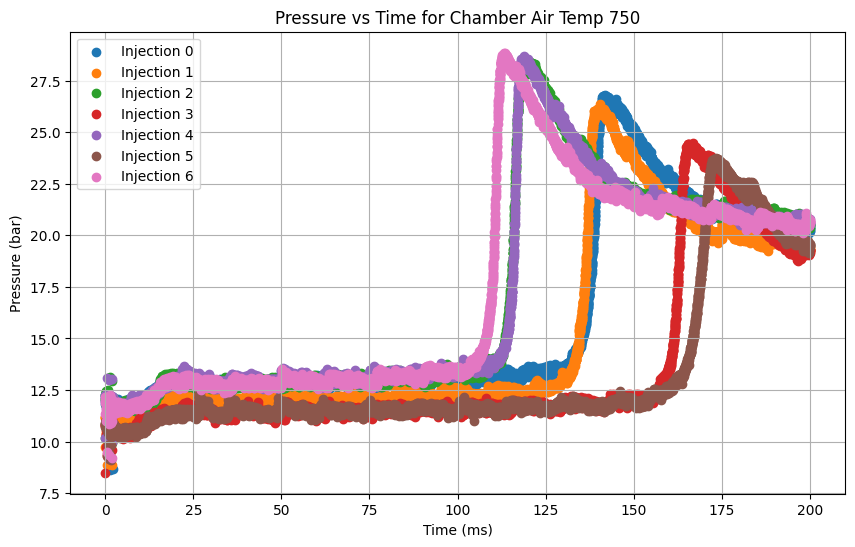

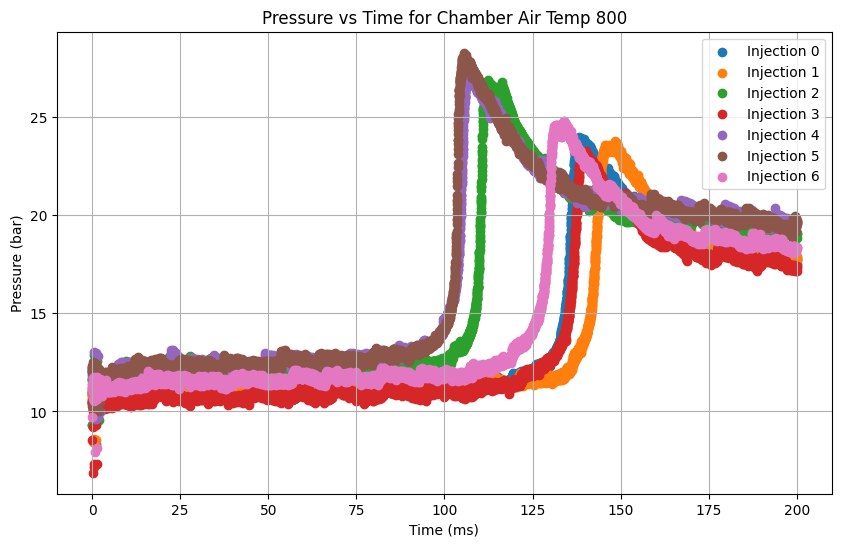

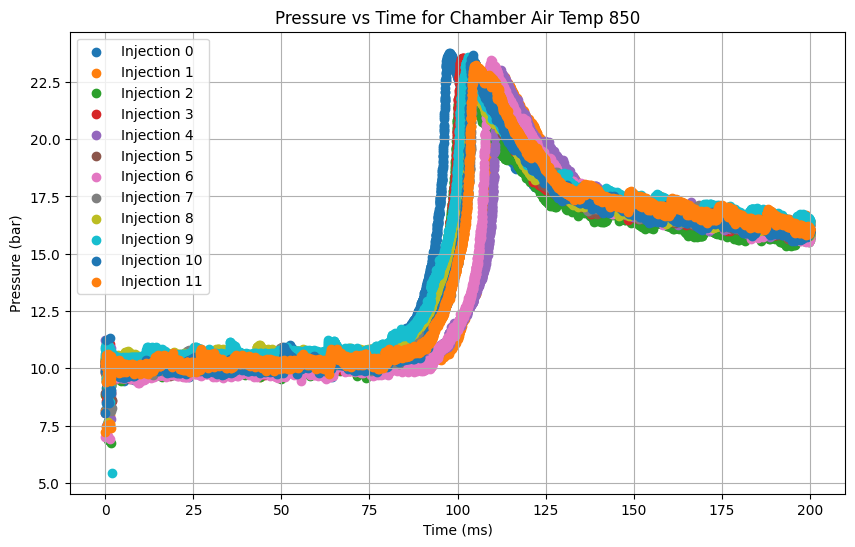

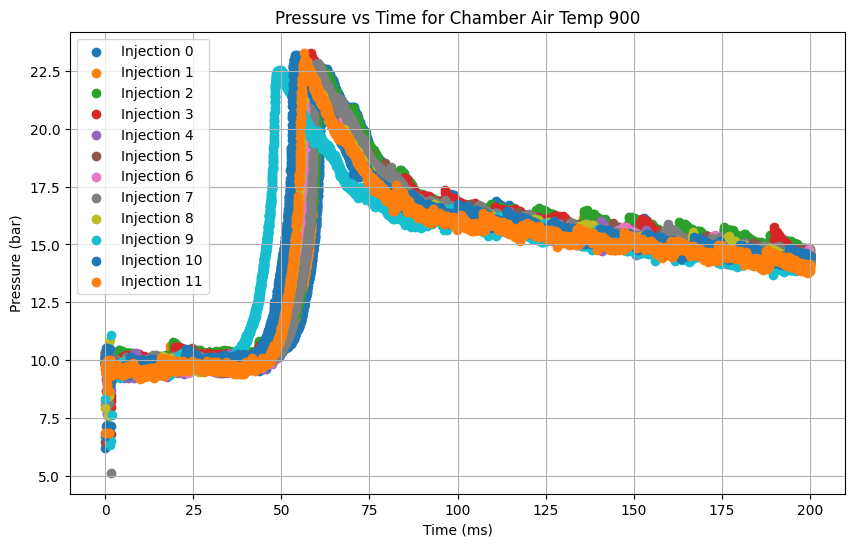

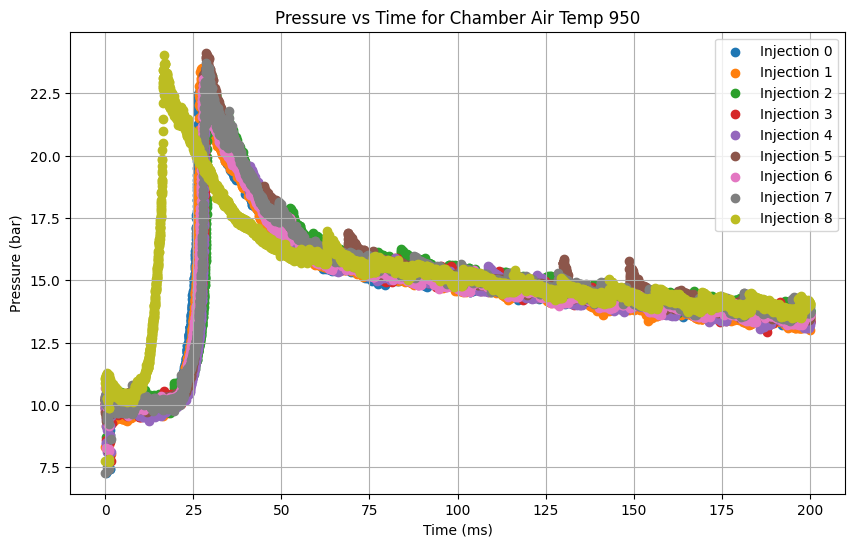

In [5]:
# per each unique chamber air temp plot pressure vs time for all injections
for chamber in df['Chamber Air Temp'].unique():
    chamber_df = df[df['Chamber Air Temp'] == chamber]
    plt.figure(figsize=(10, 6))
    for injection in chamber_df['Inj Num'].unique():
        injection_df = chamber_df[chamber_df['Inj Num'] == injection]
        plt.scatter(injection_df['Time'], injection_df['Pressure(Bar)'], label=f'Injection {injection}')
    plt.title(f'Pressure vs Time for Chamber Air Temp {chamber}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Pressure (bar)')
    plt.legend()
    plt.grid()
    plt.show()

Apply A Lowpass Filter

In [6]:
# only run this once
df.insert(11, 'dP/dT', '') 


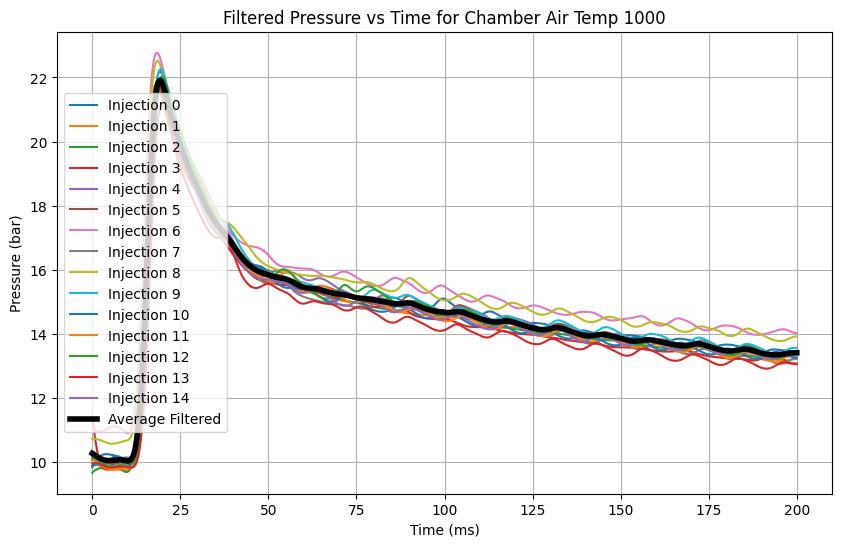

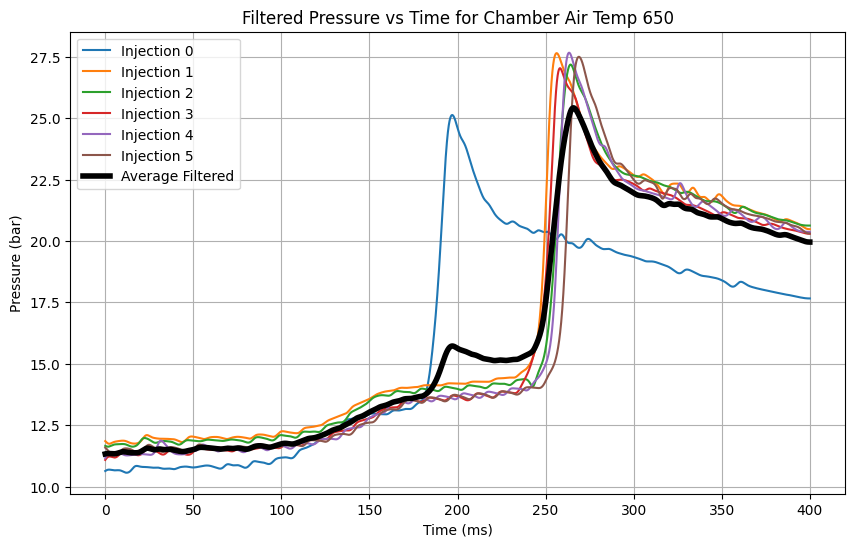

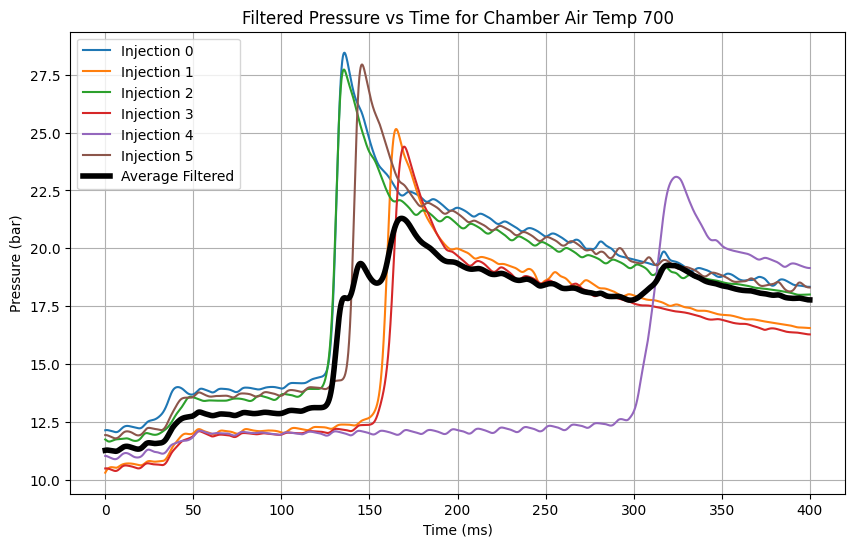

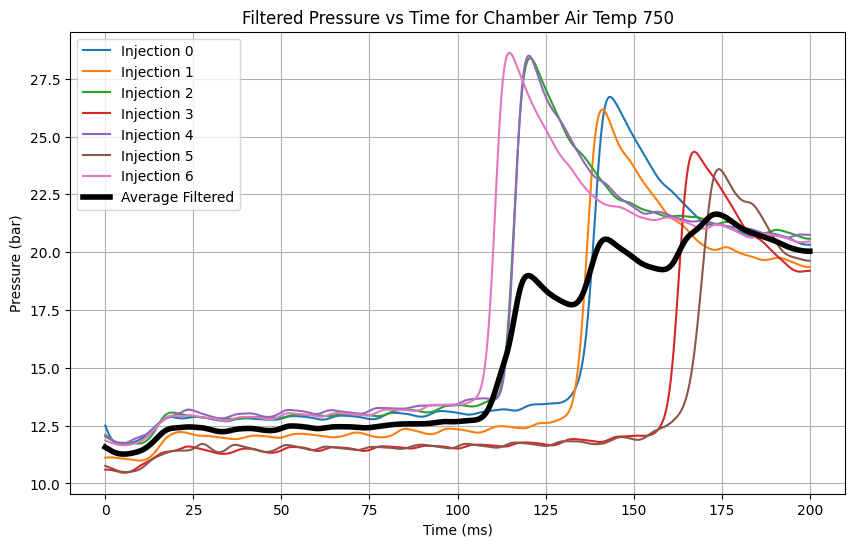

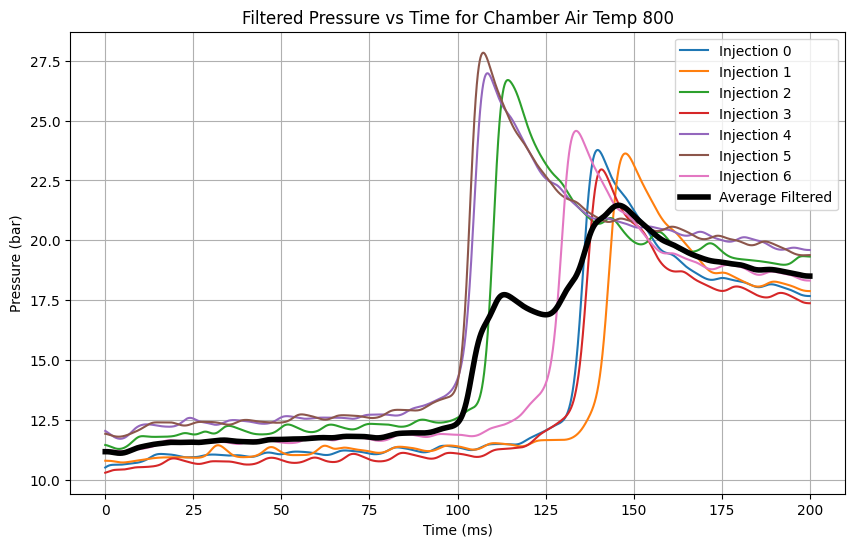

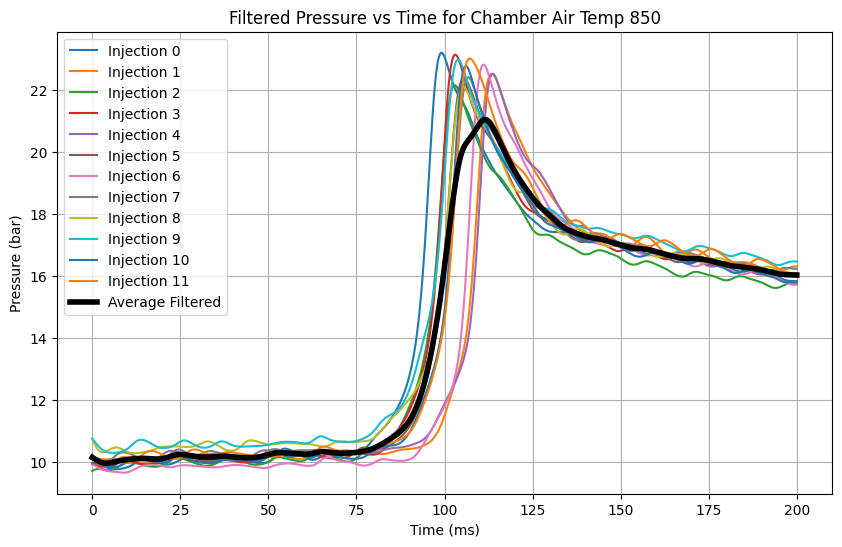

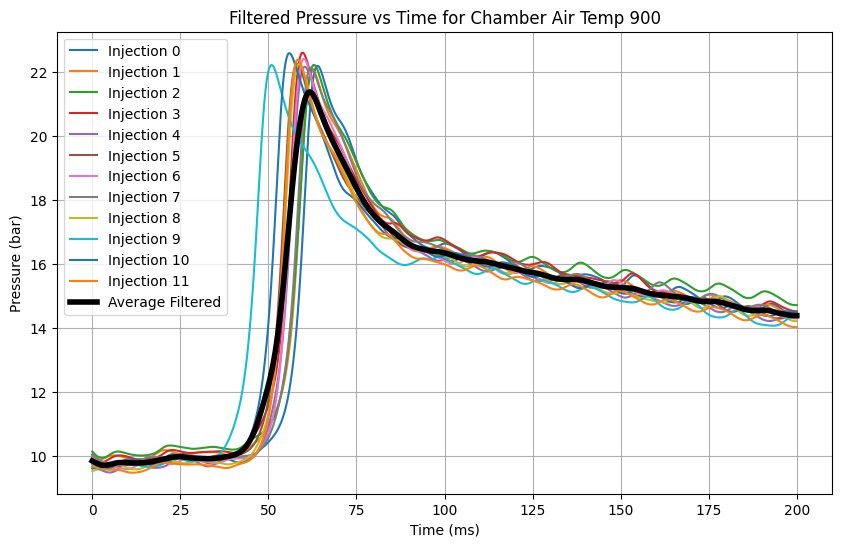

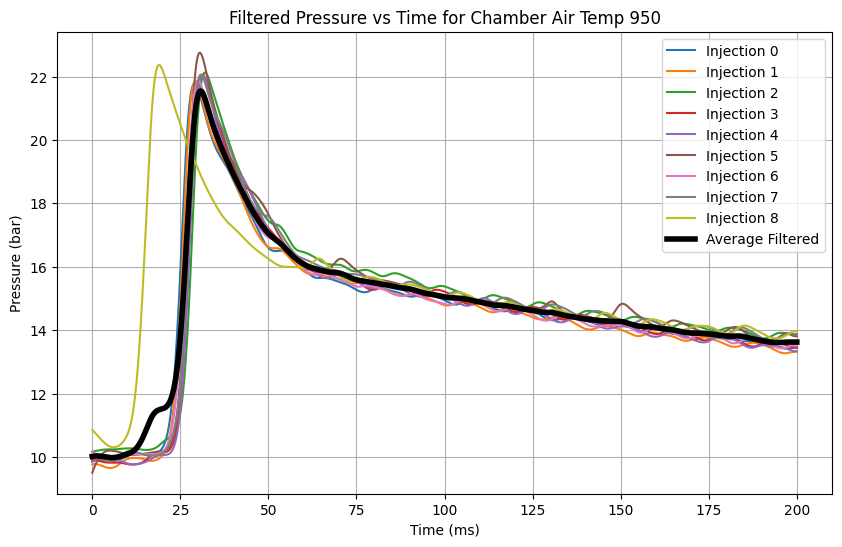

In [7]:
# apply filtfilt to all the above plots for each individual injection and then take the average of the filtered data
# also takes the derivative of the filtered daata and adds it to the dataframe
for chamber in df['Chamber Air Temp'].unique():
    chamber_df = df[df['Chamber Air Temp'] == chamber]
    plt.figure(figsize=(10, 6))
    filter2avg = []
    for injection in chamber_df['Inj Num'].unique():
        injection_df = chamber_df[chamber_df['Inj Num'] == injection]
        b, a = signal.butter(2, 0.005, 'low')
        filtered_pressure = signal.filtfilt(b, a, injection_df['Pressure(Bar)'])
        filter2avg.append(filtered_pressure)
        deriv = np.gradient(filtered_pressure, injection_df['Time'])
        
        df.loc[injection_df.index, 'dP/dT'] = deriv
        plt.plot(injection_df['Time'], filtered_pressure, label=f'Injection {injection}')
        
    filter2avg = np.array(filter2avg)
    filter2plot = np.mean(filter2avg, axis=0)
    
    plt.plot(injection_df['Time'], filter2plot, label='Average Filtered', color='black', linewidth=4)
    
    plt.title(f'Filtered Pressure vs Time for Chamber Air Temp {chamber}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Pressure (bar)')
    plt.legend()
    plt.grid()
    plt.show()


In [8]:
df        

,Inj Num,Pressure(Bar),Phi,Fuel Type,Chamber Air Temp,Inj Press,DOI,Chamber Press,Period,Wall Temp,Time,dP/dT
0,0,9.920528,0p5,isooctane,1000,1000.0,1200.0,10.0,0.00002,800.0,0.00,0.202853
1,0,10.204670,0p5,isooctane,1000,1000.0,1200.0,10.0,0.00002,800.0,0.02,0.202838
2,0,10.140638,0p5,isooctane,1000,1000.0,1200.0,10.0,0.00002,800.0,0.04,0.202786
3,0,10.204670,0p5,isooctane,1000,1000.0,1200.0,10.0,0.00002,800.0,0.06,0.202694
4,0,10.124630,0p5,isooctane,1000,1000.0,1200.0,10.0,0.00002,800.0,0.08,0.202561
...,...,...,...,...,...,...,...,...,...,...,...,...
859995,8,14.083114,0p5,isooctane,950,1000.0,1200.0,10.0,0.00002,750.0,199.90,0.001715
859996,8,14.043094,0p5,isooctane,950,1000.0,1200.0,10.0,0.00002,750.0,199.92,0.00147
859997,8,14.035090,0p5,isooctane,950,1000.0,1200.0,10.0,0.00002,750.0,199.94,0.001243
859998,8,14.015080,0p5,isooctane,950,1000.0,1200.0,10.0,0.00002,750.0,199.96,0.001035


Find Injection Delays

In [9]:
# find max dP/dT value for each injection at each chamber air temp and the time at which it occurs
inj_delay_df = pd.DataFrame(columns=['Chamber Air Temp', 'Inj Num', 'Max dP/dT', 'Time'])
for chamber in df['Chamber Air Temp'].unique():
    chamber_df = df[df['Chamber Air Temp'] == chamber]
    for injection in chamber_df['Inj Num'].unique():
        injection_df = chamber_df[chamber_df['Inj Num'] == injection]
        max_dP_dT = injection_df['dP/dT'].max()
        max_dP_dT_time = injection_df.loc[injection_df['dP/dT'].idxmax(), 'Time']
        # add this data to inj_delay_df
        new_row = {'Chamber Air Temp': chamber, 'Inj Num': injection, 'Max dP/dT': max_dP_dT, 'Time': max_dP_dT_time}
        inj_delay_df.loc[len(inj_delay_df)] = new_row
inj_delay_df

,Chamber Air Temp,Inj Num,Max dP/dT,Time
0,1000,0,2.995334,15.76
1,1000,1,2.999954,15.14
2,1000,2,3.029349,14.70
3,1000,3,2.929979,15.04
4,1000,4,3.021934,16.22
...,...,...,...,...
69,950,4,2.683825,27.76
70,950,5,2.843459,27.12
71,950,6,2.479669,26.64
72,950,7,2.634181,27.44


In [10]:
print(inj_delay_df.to_string())

    Chamber Air Temp  Inj Num  Max dP/dT    Time
0               1000        0   2.995334   15.76
1               1000        1   2.999954   15.14
2               1000        2   3.029349   14.70
3               1000        3   2.929979   15.04
4               1000        4   3.021934   16.22
5               1000        5   2.984675   15.78
6               1000        6   2.999474   14.86
7               1000        7   3.019710   15.94
8               1000        8   2.990219   15.16
9               1000        9   3.082357   15.90
10              1000       10   3.031482   16.20
11              1000       11   3.043424   15.70
12              1000       12   3.058125   16.38
13              1000       13   2.871014   16.48
14              1000       14   2.909868   15.72
15               650        0   1.268455  191.34
16               650        1   1.838493  250.62
17               650        2   1.348953  256.76
18               650        3   1.539815  253.62
19               650

Locate Any Outliers and Remove Them

Text(0, 0.5, 'Injection Delay (ms)')

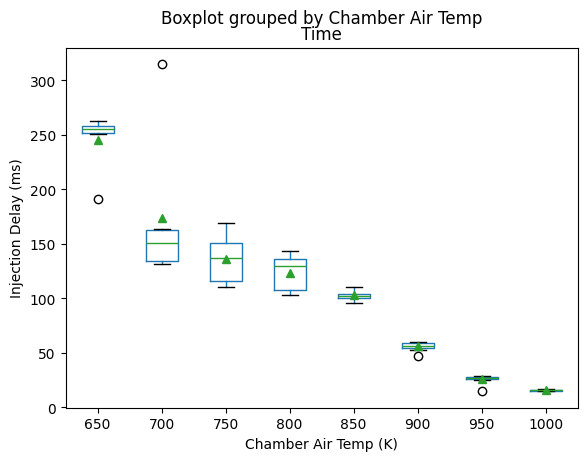

In [11]:
boxplot = inj_delay_df.boxplot(column='Time', by='Chamber Air Temp', grid=False, showmeans=True)
plt.xlabel('Chamber Air Temp (K)')
plt.ylabel('Injection Delay (ms)')

Text(0, 0.5, 'Injection Delay (ms)')

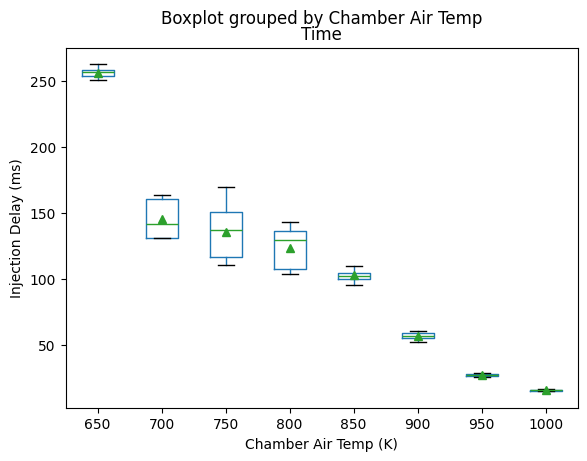

In [12]:
# identify the outliers in the boxplot and remove them from the dataframe
outliers = []
for chamber in inj_delay_df['Chamber Air Temp'].unique():
    chamber_df = inj_delay_df[inj_delay_df['Chamber Air Temp'] == chamber]
    q1 = chamber_df['Time'].quantile(0.25)
    q3 = chamber_df['Time'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers += list(chamber_df[(chamber_df['Time'] < lower_bound) | (chamber_df['Time'] > upper_bound)].index)
# remove the outliers from the dataframe
inj_delay_df = inj_delay_df.drop(outliers)

boxplot2 = inj_delay_df.boxplot(column='Time', by='Chamber Air Temp', grid=False, showmeans=True)
plt.xlabel('Chamber Air Temp (K)')
plt.ylabel('Injection Delay (ms)')



Plot Injection Delay vs 1000/Chamber Air Temp

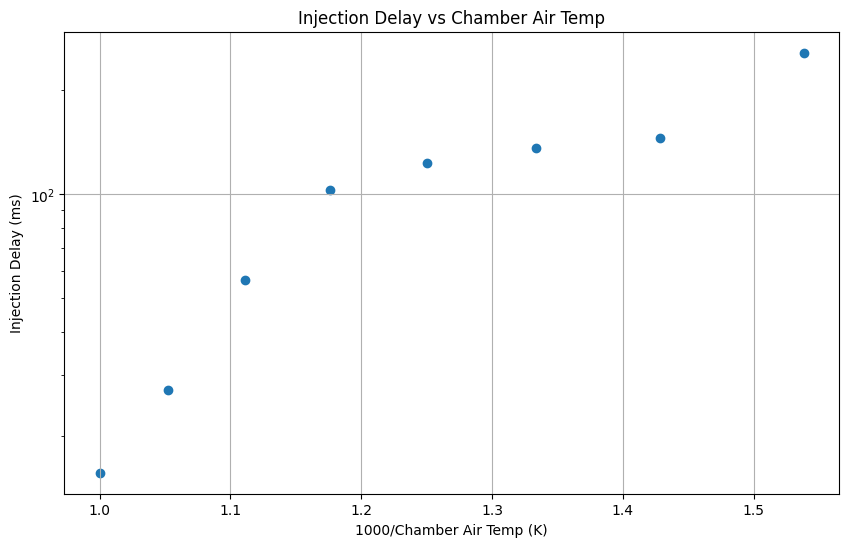

In [13]:
to_plot = inj_delay_df.groupby('Chamber Air Temp')['Time'].mean()
to_plot = to_plot.reset_index()
plt.figure(figsize=(10, 6))
plt.scatter((1000/to_plot['Chamber Air Temp']), to_plot['Time'], marker='o')
# make y axis log scale
plt.yscale('log')
plt.title('Injection Delay vs Chamber Air Temp')
plt.xlabel('1000/Chamber Air Temp (K)')
plt.ylabel('Injection Delay (ms)')
plt.grid()

Can Use This To Compare With Old Data

In [14]:
to_plot

,Chamber Air Temp,Time
0,650,256.352000
1,700,145.608000
2,750,135.882857
3,800,123.371429
4,850,102.738333
5,900,56.636364
6,950,27.077500
7,1000,15.665333


Plot All Injection Delays Along Side The Average

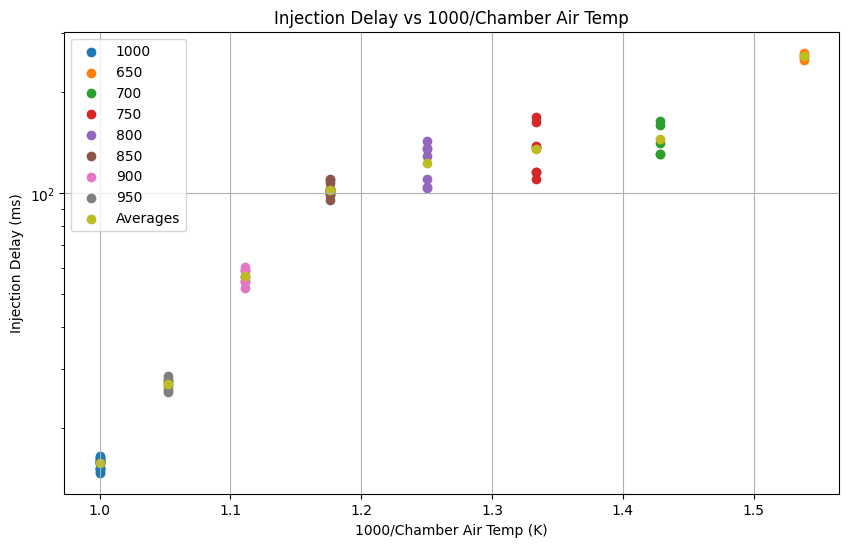

In [15]:
plt.figure(figsize=(10, 6))
for chamber in inj_delay_df['Chamber Air Temp'].unique():
    chamber_df = inj_delay_df[inj_delay_df['Chamber Air Temp'] == chamber]
    plt.scatter(1000/chamber_df['Chamber Air Temp'], chamber_df['Time'], marker='o')

to_plot = inj_delay_df.groupby('Chamber Air Temp')['Time'].mean()
to_plot = to_plot.reset_index()
plt.scatter((1000/to_plot['Chamber Air Temp']), to_plot['Time'], marker='o')

plt.title(f'Injection Delay vs 1000/Chamber Air Temp')
plt.xlabel('1000/Chamber Air Temp (K)')
plt.ylabel('Injection Delay (ms)')
plt.grid()
plt.yscale('log')
plt.legend(['1000', '650', '700', '750', '800', '850', '900', '950', 'Averages'])
plt.show()
